<a href="https://colab.research.google.com/github/anirudhgs1106/Python-Machine-Learning/blob/main/linear_regression_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression - Univariate**

*1. Without sklearn module*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/cancer.csv')
df

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746
...,...,...
296,250,62931
297,267,63476
298,244,66676
299,248,74005


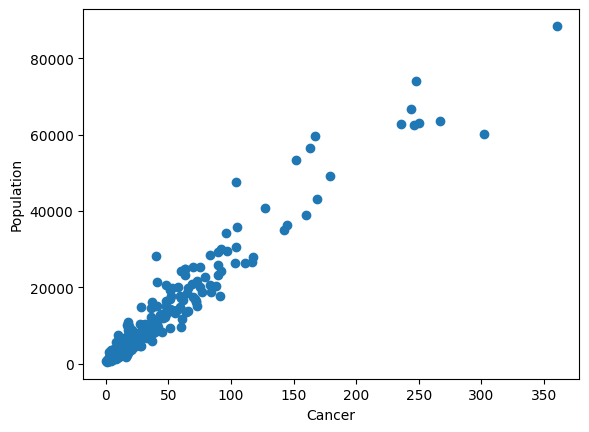

In [3]:
x=np.array(df['cancer'])
y=np.array(df['population'])
plt.scatter(x,y)
plt.xlabel('Cancer')
plt.ylabel('Population')
plt.show()

In [4]:
mean_x=np.mean(x)
mean_y=np.mean(y)
print('Mean of x: ',mean_x)
print('Mean of y: ',mean_y)

Mean of x:  39.857142857142854
Mean of y:  11288.056478405315


In [5]:
num=0
den=0
for i in range(len(x)):
  num+=((x[i]-mean_x)*(y[i]-mean_y))
  den+=(x[i]-mean_x)**2
slope=num/den
intercept=mean_y-(slope*mean_x)

In [6]:
y_pred=slope*x+intercept

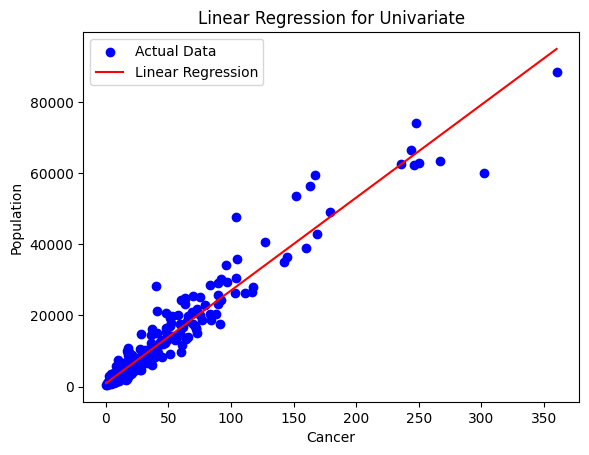

In [7]:
plt.scatter(x,y,label='Actual Data',color="Blue")
plt.plot(x,y_pred,label='Linear Regression',color='Red')
plt.xlabel('Cancer')
plt.ylabel('Population')
plt.legend()
plt.title('Linear Regression for Univariate')
plt.show()

In [8]:
# R_square=1-(SSR/SST)
num_r=0
den_r=0
for i in range(len(x)):
  num_r+=(y[i]-y_pred[i])**2
  den_r+=(y[i]-mean_y)**2
r_sq=1-(num_r/den_r)
print('R_Square: ',r_sq)

R_Square:  0.9351930401579103


*2. With sklearn module*

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [10]:
df=pd.read_csv('/content/cancer.csv')
df

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746
...,...,...
296,250,62931
297,267,63476
298,244,66676
299,248,74005


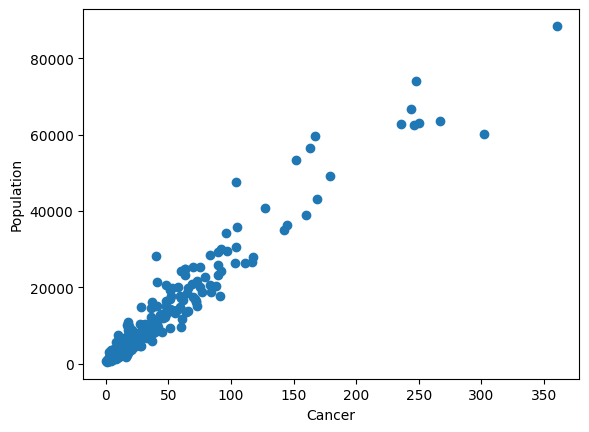

In [11]:
plt.scatter(x,y)
plt.xlabel("Cancer")
plt.ylabel("Population")
plt.show()

In [12]:
x=np.array(df['cancer']).reshape(-1,1)
y=np.array(df['population'])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

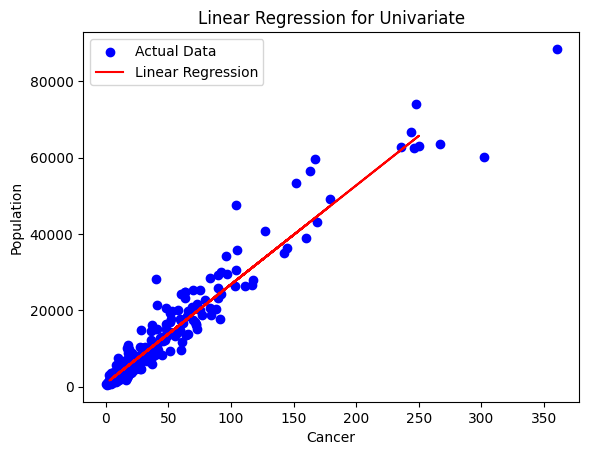

In [15]:
plt.scatter(x,y,label='Actual Data',color="Blue")
plt.plot(x_test.flatten(),y_pred,label='Linear Regression',color='Red')
plt.xlabel('Cancer')
plt.ylabel('Population')
plt.legend()
plt.title('Linear Regression for Univariate')
plt.show()

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 15911913.1812721
Root Mean Squared Error: 3988.9739509392766
R-squared: 0.9137100248051961


3. Gradient Descendent

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('/content/cancer.csv')
df

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746
...,...,...
296,250,62931
297,267,63476
298,244,66676
299,248,74005


In [19]:
df.isnull().sum()
df=df.dropna()

In [20]:
x=np.array(df['cancer']).reshape(-1,1)
x=np.hstack((np.ones_like(x),x))
x[:10]

array([[1, 1],
       [1, 0],
       [1, 3],
       [1, 4],
       [1, 3],
       [1, 4],
       [1, 1],
       [1, 5],
       [1, 5],
       [1, 5]])

In [21]:
y=np.array(df['population'])
y

array([  445,   559,   677,   681,   746,   869,   950,   976,  1096,
        1098,  1114,  1125,  1236,  1285,  1291,  1318,  1323,  1327,
        1438,  1479,  1536,  1598,  1635,  1667,  1696,  1792,  1795,
        1808,  1838,  1838,  1847,  1933,  1959,  1990,  2003,  2070,
        2091,  2099,  2104,  2147,  2154,  2163,  2172,  2174,  2183,
        2193,  2210,  2212,  2236,  2245,  2261,  2317,  2333,  2393,
        2404,  2419,  2462,  2476,  2477,  2483,  2511,  2591,  2624,
        2690,  2731,  2735,  2736,  2747,  2782,  2783,  2793,  2891,
        2894,  2906,  2929,  2935,  2962,  3054,  3112,  3118,  3185,
        3217,  3236,  3290,  3314,  3316,  3401,  3409,  3426,  3470,
        3488,  3511,  3549,  3571,  3578,  3620,  3654,  3680,  3683,
        3688,  3706,  3733,  3800,  3802,  3832,  3863,  3891,  4008,
        4093,  4149,  4162,  4223,  4232,  4312,  4329,  4331,  4399,
        4470,  4618,  4669,  4681,  4737,  4784,  4829,  4857,  4918,
        4967,  5041,

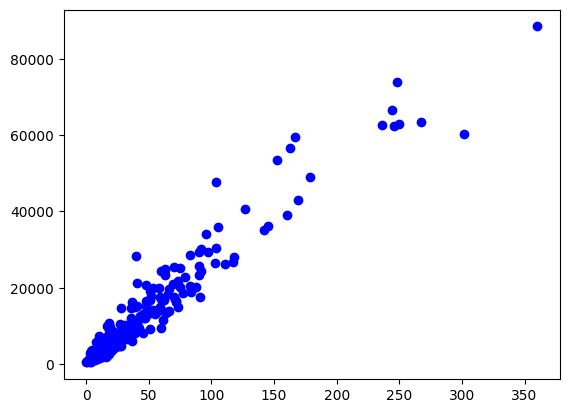

In [22]:
plt.scatter(x[:,1],y,color='Blue')
plt.show()

In [23]:
def predict(x,weights):
  y_cap=np.dot(x,weights)
  return y_cap

In [24]:
def cost(x,y,weights,m):
  y_cap=predict(x,weights)
  cst=(1/(2*m))*((y_cap-y)**2).sum()
  return cst

In [25]:
def gradient(x,y,weights,alpha,prev_cost,m):
  curr_cost=cost(x,y,weights,m)
  while(prev_cost-curr_cost)>threshold:
    y_cap=predict(x,weights)
    gradient=(1/m)*np.dot(x.T,y_cap-y)
    weights=weights-alpha*gradient
    prev_cost=curr_cost
    curr_cost=cost(x,y,weights,m)
  return weights

In [26]:
alpha=0.0001
threshold=0.0001
m=x.shape[0]
n=x.shape[1]
prev_cost=float('inf')
weights=np.zeros(n)
weights=gradient(x,y,weights,alpha,prev_cost,m)
y_pred=predict(x,weights)
print("Weights: ",weights)

Weights:  [867.46244628 261.42350883]


In [27]:
def predict(x, weights):
    return np.dot(x, weights)
y_pred=predict(x,weights)

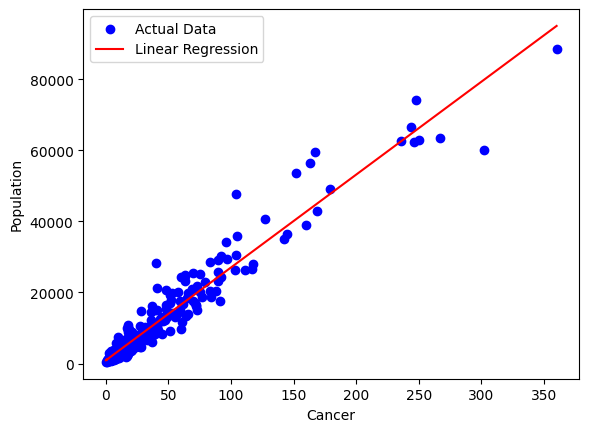

In [28]:
plt.scatter(x[:,1],y,color='Blue',label="Actual Data")
plt.plot(x[:,1],y_pred,color="Red",label="Linear Regression")
plt.xlabel("Cancer")
plt.ylabel("Population")
plt.legend()
plt.show()